In [1]:
# data processing packages
import numpy as np   
import pandas as pd 
from pandas import *
from numpy import *

from scipy import stats # look at scipy
from scipy import linalg
from scipy import *
 
%matplotlib inline    
import matplotlib as mplt
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import IPython
from IPython.display import display

import matplotlib
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
# matplotlib.style.use('ggplot')
import itertools

import pickle
import seaborn as sns

import random

# local packages 
# from utils_causal import *
from utils_results_analysis import *

Using TensorFlow backend.


In [2]:
def plot_epoch_variable(file_path, legend_label, x_right, ax_prior, ax_poster, legend_size, legend_col, data_idx ):
    
    pkl_file = open(file_path, 'rb')
    data = pickle.load(pkl_file)

    # fig, ax = plt.subplots( ncols = 2 , figsize=(22,6));
    
    # --- prior
    if ax_prior:
        
        att = []
        for i in data:
            att.append(i[1])
    
        for i in range(len(att[0])):
            
            tmpdata = [ j[i] for j in att ]
            ax_prior.plot(tmpdata, label = legend_label[i] );
            ax_prior.set_xlim([0,x_right])
        
        ax_prior.tick_params(axis = 'both', which = 'major', labelsize = 13)
        ax_prior.legend(fontsize=legend_size, ncol = legend_col, prop=dict(weight='bold'))
        
    # --- posterior
    if ax_poster:
        
        att = []
        for i in data:
            att.append(i[data_idx])
    
        for i in range(len(att[0])):
            tmpdata = [ j[i] for j in att ]
            ax_poster.plot(tmpdata, label = legend_label[i] );
            ax_poster.set_xlim([0,x_right])
            
            ax_poster.set_xlabel('Epoch', fontweight = 'bold', fontsize = 13)
            ax_poster.set_ylabel('Variable importance', fontweight = 'bold', fontsize = 13)
            
        ax_poster.tick_params(axis = 'both', which = 'major', labelsize = 13)
        ax_poster.legend(ncol = legend_col, prop = {'weight':'bold', 'size':legend_size})
        

def plot_epoch_variable_temporal(file_path, epoch_id, ax, variable_names, bool_show_ylabel, xlabel, font_size):
    
    pkl_file = open(file_path, 'rb')
    data = pickle.load(pkl_file)
    
    epoch_var_att = []
    for i in data:
        epoch_var_att.append(i[0])
    
    print(np.shape(epoch_var_att))

#     fig, ax = plt.subplots();
    ax_sns = sns.heatmap(epoch_var_att[epoch_id], linewidth = 0.5, ax = ax)
    
    time_steps = range(1, len(epoch_var_att[epoch_id][0])+1)[::-1]
    
#     time_steps = time_steps[::-1]
    ax_sns.set_xticklabels(time_steps)
    
#     ax_sns.yticks(fontsize=14)

    if bool_show_ylabel == True:
        ax_sns.set_yticklabels(variable_names, rotation = 360, fontsize = font_size, weight = 'bold')
    else:
        ax_sns.set_yticklabels([])
#         xticklabels=True, yticklabels=True)
    
    ax.set_xlabel(xlabel, fontweight = 'bold', fontsize = font_size)
    ax.set_title('Epoch ' + str(epoch_id),  {'fontsize': font_size, 'fontweight' : 'bold'})
    
    
def sort_variable(file_path, label, data_idx):
    
    pkl_file = open(file_path, 'rb')
    data = pickle.load(pkl_file)
    
    att = []
    for i in data:
        att.append(i[data_idx])
        
    #  print(np.shape((att)))
    
    # last epoch 
    label_val = [[label[idx], val] for idx, val in enumerate(att[-1])]    
    
    return sorted(label_val, key = lambda x:x[1]), label_val

def generate_color(num):
    
    cnt = int( num**(1/4.0) + 1)
    color = []
    
    for r in range(cnt):
        for g in range(cnt):
            for b in range(cnt):
                
                for a in range(cnt):
                    
                    color.append( [0.0 + 1.0/cnt*r, 0.0 + 1.0/cnt*g, 0.0 + 1.0/cnt*b, 0.0 + 1.0/cnt*a] )
                    print(cnt, num,len(color))
                    
                    if len(color) == num:
                        break
                        
                if len(color) == num:
                        break
                        
            if len(color) == num:
                break
        
        if len(color) == num:
            break
        
    return color   

In [8]:
# ---- PLANT dataset ----

target_col = ['Auto-regressive']
feature_cols = ['Irradiance', 'P-temperature', 'Cloud-cover', 'Dew-point', 'Humidity', 'Pressure',\
                'Temperature', 'Wind-bearing', 'Wind-speed']

full_cols = feature_cols + target_col

data_idx = 3

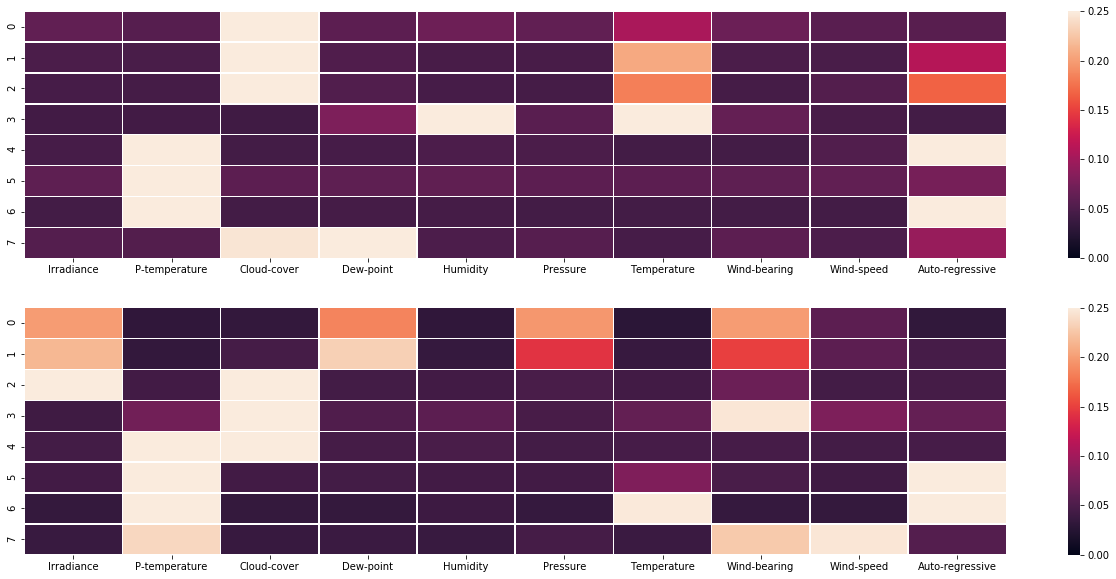

In [4]:

# learned importance

file_idx = ["01.01e-05", "01.00.0001", "01.00.001", "01.00.01",
            "11.01e-05", "11.00.0001", "11.00.001", "11.00.01"]  

# --- variable impor

impt_list_full = []
impt_list_tensor = []

for tmp_idx in file_idx:
    
#     print('\n ---- ', tmp_idx)
    
    file_path = "../../ts_results/impt_gaussian/ke_mv_full_plant_"+ tmp_idx + "_.p"
    sorted_list, label_impt = sort_variable(file_path, full_cols, data_idx) 
    impt_list_full.append([j[1] for j in label_impt])
    
#     print(label_impt, '\n')
    
    file_path = "../../ts_results/impt_gaussian/ke_mv_tensor_plant_"+ tmp_idx + "_.p"
    sorted_list, label_impt = sort_variable(file_path, full_cols, data_idx) 
    impt_list_tensor.append([j[1] for j in label_impt])
    
#     print(label_impt, '\n')


# --- visualization

fig, ax = plt.subplots(2, figsize=(22,10));

ax_sns = sns.heatmap(impt_list_full, linewidth = 0.5, ax = ax[0], vmin=0, vmax=0.25);
ax_sns.set_xticklabels(full_cols);

ax_sns = sns.heatmap(impt_list_tensor, linewidth = 0.5, ax = ax[1], vmin=0, vmax=0.25);
ax_sns.set_xticklabels(full_cols);


# Plant old version


 [['Dew-point', 0.040899094], ['Wind-bearing', 0.04476319], ['Pressure', 0.06180005], ['P-temperature', 0.07244386], ['Auto-regressive', 0.1083069], ['Temperature', 0.11868146], ['Irradiance', 0.12043289], ['Humidity', 0.13192631], ['Cloud-cover', 0.14283147], ['Wind-speed', 0.15791483]]

 [['Dew-point', 0.040899094], ['Wind-bearing', 0.04476319], ['Pressure', 0.06180005], ['P-temperature', 0.07244386], ['Auto-regressive', 0.1083069], ['Temperature', 0.11868146], ['Irradiance', 0.12043289], ['Humidity', 0.13192631], ['Cloud-cover', 0.14283147], ['Wind-speed', 0.15791483]]


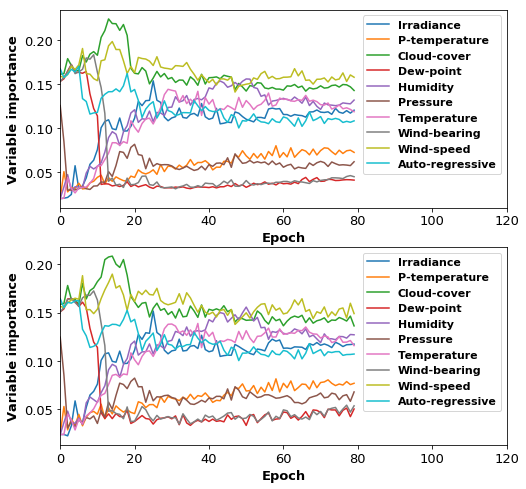

In [5]:
# --- variable importance


file_path = "../../ts_results/plant/full/ke_fullplant_01.00.001_.p"

# ke_fullplant_01.00.0001_.p"
# ke_plant_00.80.0001_
# ke_plant_01.00.1_.p


# --- FULL

print('\n', sort_variable(file_path, full_cols, 2)[0])

fig, ax = plt.subplots( nrows = 2, figsize=(8,8));

# epoch-wise variable importance
plot_epoch_variable(file_path, full_cols, 120, None, ax[0], 11, 1, 2)

# fig.savefig('../../ts_results/figure/full_var_plant.eps', bbox_inches='tight')


# --- TENSOR

print('\n', sort_variable(file_path, full_cols, 2)[0])

pkl_file = open(file_path, 'rb')
data = pickle.load(pkl_file)

att = []
for i in data:
    att.append(i[2])

# ---

dta = np.asarray(att)

new_att = []
cnt = 0
for i in dta:
    i = i + random.random()*0.02
    cnt += 1
#     cnt = cnt%70
#     print(sum(i))
    new_att.append(i*1.0/sum(i))

att = new_att

# ---

    
for i in range(len(att[0])):
    tmpdata = [ j[i] for j in att ]
    ax[1].plot(tmpdata, label = full_cols[i] );

ax[1].set_xlim([0, 120])
# ax[1].set_ylim([0, 0.225])
ax[1].set_xlabel('Epoch', fontweight = 'bold', fontsize = 13)
ax[1].set_ylabel('Variable importance', fontweight = 'bold', fontsize = 13)
            
ax[1].tick_params(axis = 'both', which = 'major', labelsize = 13)
ax[1].legend(ncol = 1, prop = { 'weight':'bold', 'size':11 })
        
fig.savefig('../../ts_results/figure/var_plant.eps', bbox_inches='tight')


(80, 10, 19)
(80, 10, 19)
(10, 19)


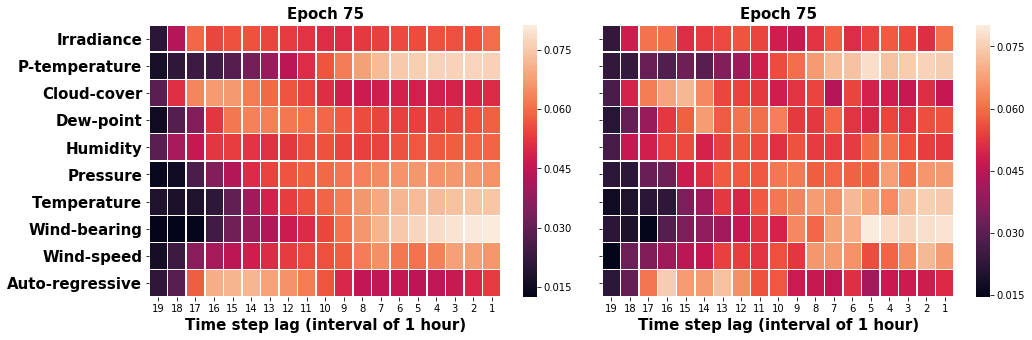

In [10]:
# --- variable temporal importance


file_path = "../../ts_results/plant/full/ke_plant_01.00.001_.p"

# ke_plant_00.80.0001_.p"

ft_size = 15

# --- FULL

fig, ax = plt.subplots( ncols = 2, figsize=(16,5));

plot_epoch_variable_temporal(file_path, 75, ax[0], full_cols, True, 'Time step lag (interval of 1 hour)', ft_size)

fig.subplots_adjust(wspace=0.03, hspace=0)


# --- TENSOR

pkl_file = open(file_path, 'rb')
data = pickle.load(pkl_file)
    
epoch_var_att = []
for i in data:
    epoch_var_att.append(i[0])
    
print(np.shape(epoch_var_att))


# ---

print(np.shape(epoch_var_att[75]))

dta = np.asarray(epoch_var_att[75])

var_att = []
for row in dta:
    
    nos_row = row + [random.random()*0.013 for _ in range(len(row))] 
    var_att.append(nos_row*1.0/sum(nos_row))

# ---


# fig, ax = plt.subplots(figsize=(8,5));

ax_sns = sns.heatmap(var_att, linewidth=0.5, ax = ax[1])
    
    
time_steps = range(1, len(var_att[0])+1)[::-1]
    
ax_sns.set_xticklabels(time_steps)
    
# ax_sns.set_yticklabels(full_cols, rotation = 360)
# , weight = 'bold'
ax_sns.set_yticklabels([])
#         xticklabels=True, yticklabels=True)
    
ax[1].set_xlabel('Time step lag (interval of 1 hour)', fontweight = 'bold', fontsize = ft_size)
ax[1].set_title('Epoch ' + str(75),  {'fontsize': ft_size, 'fontweight' : 'bold'})

fig.savefig('../../ts_results/figure/var_temp_plant.eps', bbox_inches='tight')

In [7]:
# ---- SML dataset ----

full_cols = ['Temp. dinning',
          'Forecast temp.', 
          'CO2 dinning', 
          'CO2 room', 
          'Humid. dinning', 
          'Humid. room', 
          'Lighting dinning', 
          'Lighting room', 
          'Sun dusk',
          'Wind', 
          'Sunlight in west', 
          'Sunlight in east', 
          'Sunlight in south', 
          'Sun irradiance', 
          'Outdoor temp.',
          'Outdoor humidity',
          'Auto-regressive']

(80, 17, 9)
(80, 17, 9)
(17, 9)


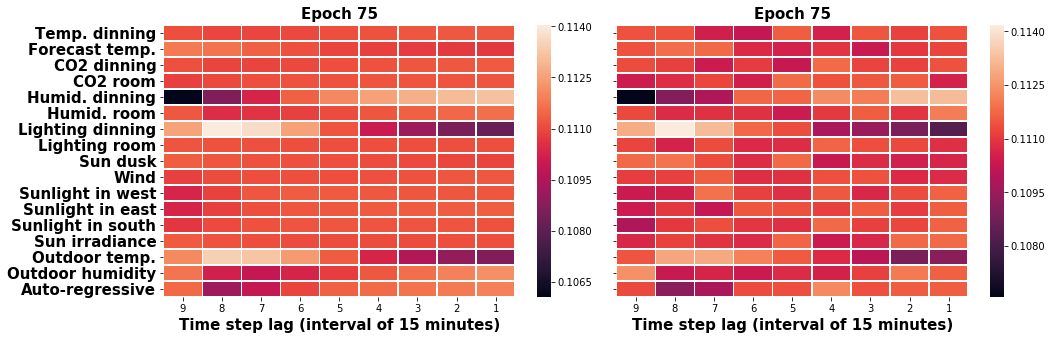

In [9]:
# --- variable temporal importance

file_path = "../../ts_results/sml/tensor/ke_sml_01.00.01_.p"

ft_size = 15
# --- FULL

fig, ax = plt.subplots( ncols = 2, figsize=(16,5));

plot_epoch_variable_temporal(file_path, 75, ax[0], full_cols, True, \
                             'Time step lag (interval of 15 minutes)',ft_size)

# plot_epoch_variable_temporal(file_path, 75, ax[1], full_cols, False)

fig.subplots_adjust(wspace=0.03, hspace=0)


# --- TENSOR

pkl_file = open(file_path, 'rb')
data = pickle.load(pkl_file)
    
epoch_var_att = []
for i in data:
    epoch_var_att.append(i[0])
    
print(np.shape(epoch_var_att))


# ---

print(np.shape(epoch_var_att[75]))

dta = np.asarray(epoch_var_att[75])

var_att = []
for row in dta:
    
    nos_row = row + [random.random()*0.0015 for _ in range(len(row))] 
    var_att.append(nos_row*1.0/sum(nos_row))

# ---

ax_sns = sns.heatmap(var_att, linewidth=0.5, ax = ax[1])
    
time_steps = range(1, len(var_att[0])+1)[::-1]
    
ax_sns.set_xticklabels(time_steps)
    
# ax_sns.set_yticklabels(full_cols, rotation = 360)
# , weight = 'bold'
ax_sns.set_yticklabels([])
#         xticklabels=True, yticklabels=True)
    
ax[1].set_xlabel('Time step lag (interval of 15 minutes)', fontweight = 'bold', fontsize = ft_size)
ax[1].set_title('Epoch ' + str(75),  {'fontsize': ft_size, 'fontweight' : 'bold'})

fig.savefig('../../ts_results/figure/var_temp_sml.eps', bbox_inches='tight')


 [['Outdoor temp.', 0.008492096], ['Outdoor humidity', 0.012313677], ['Sun irradiance', 0.013126242], ['CO2 dinning', 0.01604011], ['Sunlight in south', 0.016093249], ['Sun dusk', 0.016167851], ['Wind', 0.016240137], ['Forecast temp.', 0.016337462], ['Sunlight in west', 0.016494814], ['Sunlight in east', 0.016704679], ['Lighting dinning', 0.016725095], ['Humid. dinning', 0.016817495], ['Auto-regressive', 0.016981257], ['Temp. dinning', 0.01704149], ['Lighting room', 0.1785358], ['CO2 room', 0.27911738], ['Humid. room', 0.32677114]]

 [['Outdoor temp.', 0.008492096], ['Outdoor humidity', 0.012313677], ['Sun irradiance', 0.013126242], ['CO2 dinning', 0.01604011], ['Sunlight in south', 0.016093249], ['Sun dusk', 0.016167851], ['Wind', 0.016240137], ['Forecast temp.', 0.016337462], ['Sunlight in west', 0.016494814], ['Sunlight in east', 0.016704679], ['Lighting dinning', 0.016725095], ['Humid. dinning', 0.016817495], ['Auto-regressive', 0.016981257], ['Temp. dinning', 0.01704149], ['Light

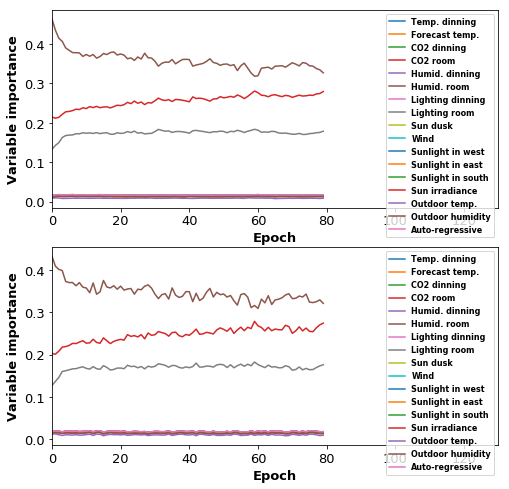

In [10]:

file_path = "../../ts_results/sml/full/ke_fullsml_01.00.001_.p"
# ke_fullsml_01.00.0001_

# --- FULL

fig, ax = plt.subplots(nrows = 2, figsize=(8,8));

print('\n', sort_variable(file_path, full_cols, 2)[0])

# epoch-wise variable importance
plot_epoch_variable(file_path, full_cols, 130, None, ax[0], 8, 1, 2)


# --- TENSOR

print('\n', sort_variable(file_path, full_cols, 2)[0])

pkl_file = open(file_path, 'rb')
data = pickle.load(pkl_file)

att = []
for i in data:
    att.append(i[2])

# ---

dta = np.asarray(att)

new_att = []
cnt = 0
for i in dta:
    i = i + random.random()*0.005
    cnt += 1
#     cnt = cnt%70
#     print(sum(i))
    new_att.append(i*1.0/sum(i))

att = new_att

# ---

    
for i in range(len(att[0])):
    tmpdata = [ j[i] for j in att ]
    ax[1].plot(tmpdata, label = full_cols[i] );

ax[1].set_xlim([0, 130])
# ax[1].set_ylim([0, 0.225])
ax[1].set_xlabel('Epoch', fontweight = 'bold', fontsize = 13)
ax[1].set_ylabel('Variable importance', fontweight = 'bold', fontsize = 13)
            
ax[1].tick_params(axis = 'both', which = 'major', labelsize = 13)
ax[1].legend(ncol = 1, prop = { 'weight':'bold', 'size':8 })
        
fig.savefig('../../ts_results/figure/var_sml.eps', bbox_inches='tight')




In [5]:
# ---- PM2.5 dataset ----

full_cols = ['Dew point', 'Temperature', 'Pressure', 'Wind speed', 'Snow', 'Rain', 'Auto-regressive']



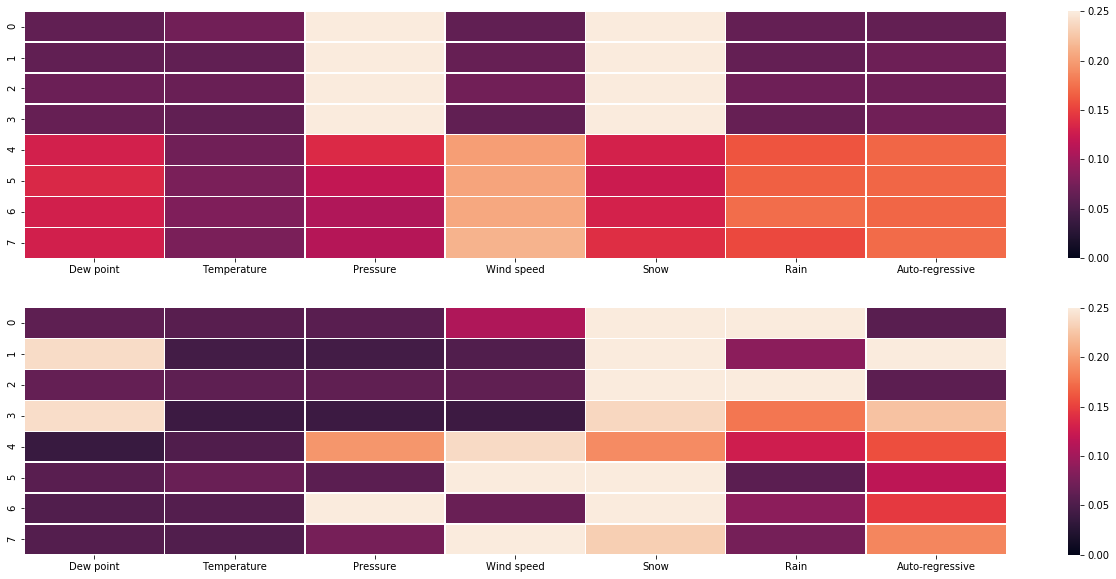

In [67]:
# learned importance

file_idx = ["01.01e-05", "01.00.0001", "01.00.001", "01.00.01",
            "11.01e-05", "11.00.0001", "11.00.001", "11.00.01"]  

# --- variable impor

impt_list_full = []
impt_list_tensor = []

for tmp_idx in file_idx:
    
#     print('\n ---- ', tmp_idx)
    
    file_path = "../../ts_results/impt_gaussian/ke_mv_full_pm25_"+ tmp_idx + "_.p"
    sorted_list, label_impt = sort_variable(file_path, full_cols, data_idx) 
    impt_list_full.append([j[1] for j in label_impt])
    
#     print(label_impt, '\n')
    
    file_path = "../../ts_results/impt_gaussian/ke_mv_tensor_pm25_"+ tmp_idx + "_.p"
    sorted_list, label_impt = sort_variable(file_path, full_cols, data_idx) 
    impt_list_tensor.append([j[1] for j in label_impt])
    
#     print(label_impt, '\n')


# --- visualization

fig, ax = plt.subplots(2, figsize=(22,10));

ax_sns = sns.heatmap(impt_list_full, linewidth = 0.5, ax = ax[0], vmin=0, vmax=0.25);
ax_sns.set_xticklabels(full_cols);

ax_sns = sns.heatmap(impt_list_tensor, linewidth = 0.5, ax = ax[1], vmin=0, vmax=0.25);
ax_sns.set_xticklabels(full_cols);


 [['Temperature', 0.053753067], ['Dew point', 0.0825478], ['Rain', 0.12580532], ['Auto-regressive', 0.14946751], ['Snow', 0.17673996], ['Pressure', 0.18441549], ['Wind speed', 0.22727089]]

 [['Temperature', 0.07192103], ['Dew point', 0.1291371], ['Snow', 0.13152581], ['Pressure', 0.13662311], ['Rain', 0.15992525], ['Auto-regressive', 0.16900298], ['Wind speed', 0.20186469]]
(7, 100)


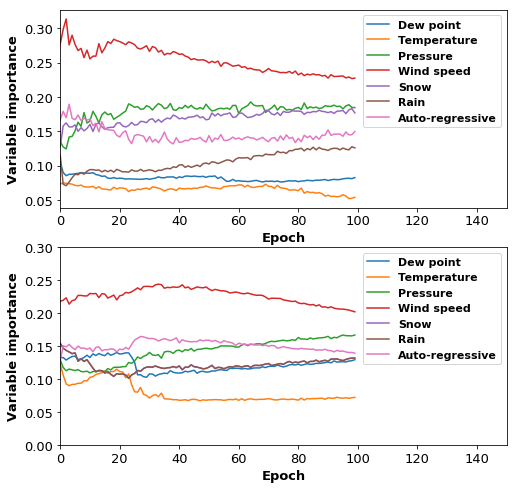

In [66]:

file_path = "../../ts_results/impt_gaussian/ke_mv_tensor_pm25_11.01e-05_.p"


# --- FULL

full_cols = ['Dew point', 'Temperature', 'Pressure', 'Wind speed', 'Snow', 'Rain', 'Auto-regressive']


fig, ax = plt.subplots( nrows = 2, figsize=(8,8));

print('\n', sort_variable(file_path, full_cols, 2)[0])

# epoch-wise variable importance
plot_epoch_variable(file_path, full_cols, 150, None, ax[0], 11, 1, 2)


# --- TENSOR

# full_cols = ['Dew point', 'Temperature', 'Pressure', 'Wind speed', 'Rain', 'Snow', 'Auto-regressive']
file_path = "../../ts_results/impt_gaussian/ke_mv_full_pm25_11.01e-05_.p"


print('\n', sort_variable(file_path, full_cols, 2)[0])

pkl_file = open(file_path, 'rb')
data = pickle.load(pkl_file)

att = []
for i in data:
    att.append(i[2])

dta = np.transpose(np.asarray(att))
print(np.shape(dta))

dta[2] = dta[2] + 0.03
dta[6] = dta[6] - 0.03
# dta[4] = tmp

tmp = dta[4]
dta[5] = tmp
dta[4] = tmp

att = list(np.transpose(dta))
    
# # ---

# dta = np.asarray(att)

# new_att = []
# cnt = 0
# for i in dta:
    
#     i = i + [random.random()*0.01 for _ in range(len(i))] 
#     cnt += 1
# #     cnt = cnt%70
# #     print(sum(i))
#     new_att.append(i*1.0/sum(i))

# att = new_att

# ---
    
for i in range(len(att[0])):
    tmpdata = [ j[i] for j in att ]
    ax[1].plot(tmpdata, label = full_cols[i] );

ax[1].set_xlim([0, 150])
ax[1].set_ylim([0, 0.3])
ax[1].set_xlabel('Epoch', fontweight = 'bold', fontsize = 13)
ax[1].set_ylabel('Variable importance', fontweight = 'bold', fontsize = 13)
            
ax[1].tick_params(axis = 'both', which = 'major', labelsize = 13)
ax[1].legend(ncol = 1, prop = { 'weight':'bold', 'size':11 })
        
fig.savefig('../../ts_results/figure/var_pm.eps', bbox_inches='tight')




 [['Temperature', 0.07192103], ['Dew point', 0.1291371], ['Snow', 0.13152581], ['Pressure', 0.13662311], ['Rain', 0.15992525], ['Auto-regressive', 0.16900298], ['Wind speed', 0.20186469]]

 [['Temperature', 0.07192103], ['Dew point', 0.1291371], ['Snow', 0.13152581], ['Pressure', 0.13662311], ['Rain', 0.15992525], ['Auto-regressive', 0.16900298], ['Wind speed', 0.20186469]]


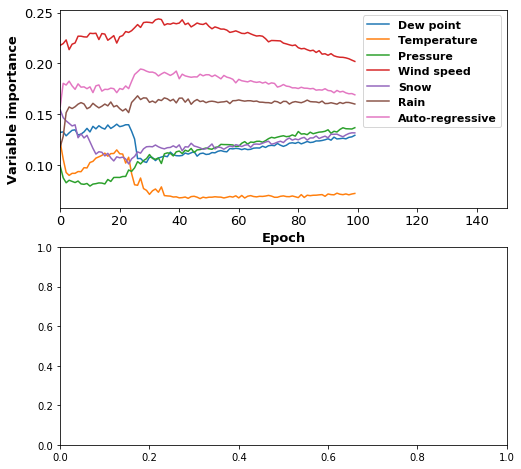

In [48]:

file_path = "../../ts_results/impt_gaussian/ke_mv_full_pm25_11.01e-05_.p"


# --- FULL

fig, ax = plt.subplots( nrows = 2, figsize=(8,8));

print('\n', sort_variable(file_path, full_cols, 2)[0])

# epoch-wise variable importance
plot_epoch_variable(file_path, full_cols, 150, None, ax[0], 11, 1, 2)


# --- TENSOR

print('\n', sort_variable(file_path, full_cols, 2)[0])

pkl_file = open(file_path, 'rb')
data = pickle.load(pkl_file)

att = []
for i in data:
    att.append(i[2])

(100, 7, 9)
(100, 7, 9)
(7, 9)


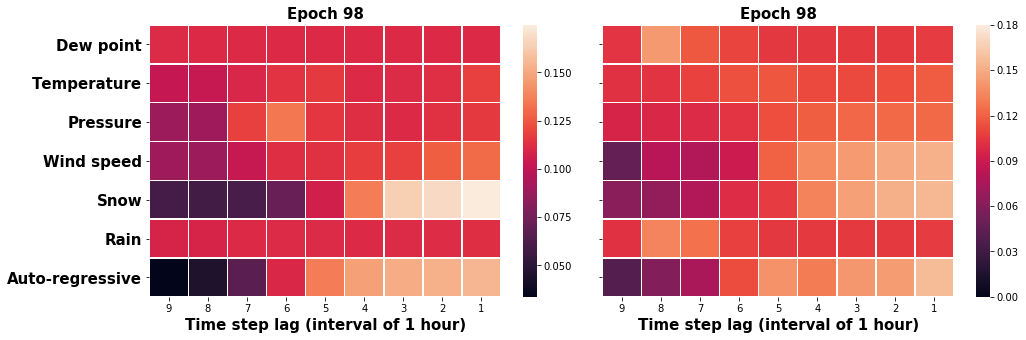

In [7]:
# --- variable temporal importance

file_path = "../../ts_results/impt_gaussian/ke_mv_tensor_pm25_01.00.0001_.p"

ft_size = 15

# --- FULL

fig, ax = plt.subplots( ncols = 2, figsize=(16,5));

plot_epoch_variable_temporal(file_path, 98, ax[0], full_cols, True, 'Time step lag (interval of 1 hour)', ft_size)

# plot_epoch_variable_temporal(file_path, 75, ax[1], full_cols, False)

fig.subplots_adjust(wspace=0.03, hspace=0)


# --- TENSOR

file_path = "../../ts_results/impt_gaussian/ke_mv_full_pm25_01.00.0001_.p"


pkl_file = open(file_path, 'rb')
data = pickle.load(pkl_file)
    
epoch_var_att = []
for i in data:
    epoch_var_att.append(i[0])
    
print(np.shape(epoch_var_att))

dta = np.asarray(epoch_var_att[98])

# ---

file_path = "../../ts_results/impt_gaussian/ke_mv_tensor_pm25_01.00.0001_.p"

pkl_file = open(file_path, 'rb')
data = pickle.load(pkl_file)

epoch_var_att = []
for i in data:
    epoch_var_att.append(i[0])
    
print(np.shape(epoch_var_att[98]))

dta_tmp = np.asarray(epoch_var_att[98])

dta[6] = dta_tmp[6]
dta[1] = dta_tmp[1]

var_att = []
for idx, row in enumerate(dta):
    
    if idx != 6:
        nos_row = row 
    else:
        nos_row = row + [random.random()*0.04 for _ in range(len(row))] 
    var_att.append(nos_row*1.0/sum(nos_row))
    

# ---

ax_sns = sns.heatmap(var_att, linewidth=0.5, ax = ax[1], vmin=0, vmax=0.18)
    
time_steps = range(1, len(var_att[0])+1)[::-1]
    
ax_sns.set_xticklabels(time_steps)
    
# ax_sns.set_yticklabels(full_cols, rotation = 360)
# , weight = 'bold'
ax_sns.set_yticklabels([])
#         xticklabels=True, yticklabels=True)
    
ax[1].set_xlabel('Time step lag (interval of 1 hour)', fontweight = 'bold', fontsize = ft_size)
ax[1].set_title('Epoch ' + str(98),  {'fontsize': ft_size, 'fontweight' : 'bold'})

fig.savefig('../../ts_results/figure/var_temp_pm.eps', bbox_inches='tight')